# Regularization of Linear Regression


###  <div align=center> Moon Il-chul(icmoon@kaist.ac.kr);<br/>Kim Young-chae(jeanne100420@kaist.ac.kr); Na Byeong-hu(wp03052@kaist.ac.kr) </div>

본 코드는 Ridge Regularization의 구현 예시입니다.
본 코드는 0과 1 사이의 X 들을 싸인함수에 fitting할때, Regularization이 Regression 에 미치는 영향을 살펴봅니다.

## 실제 구현부

Regularization은 학습의 정확도는 조금 포기하면서, 일반적인 데이터를 충분히 잘 설명할 수 있도록 모델을 데이터에 대해 다소 둔감하게 만드는 기술입니다. 즉, 기존의 Loss Function 에 Regularization term을 더한 Loss Function을 최소화하는 매개변수를 찾습니다. 그 중 Ridge Regularization을 이용한 Loss Function은 다음과 같습니다.
$$E(w)=\frac{1}{2}\sum_{n=0}^N (train_n-g(x_n,w))^2+\frac{\lambda}{2}\lVert w \rVert ^2$$

위 Loss Function을 최소화하고자 미분계수가 0이되는 지점을 찾아 w에 대해 정리하면 다음과 같은 closed form의 w를 찾을 수 있습니다.
$$w = (X^TX+\lambda I)^{-1}X^T*train$$

In [1]:
'''
@ copyright: AAI lab (http://aailab.kaist.ac.kr/xe2/page_GBex27)
@ author: Moon Il-chul: icmoon@kaist.ac.kr
@ annotated by Kim Young-chae: jeanne100420@kaist.ac.kr; Na Byeong-hu: wp03052@kaist.ac.kr
'''

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

%matplotlib inline  

Bias of zero degree line is                        0.5514
Bias of linear regression line is                  0.2651
Bias of regularized linear regression line is      0.4625

Variance of zero degree line is                    0.1540
Variance of linear regression line is              0.5912
Variance of regularized linear regression line is  0.0233


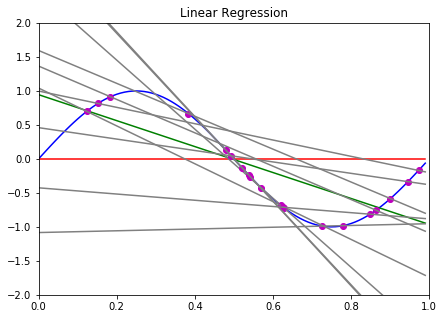

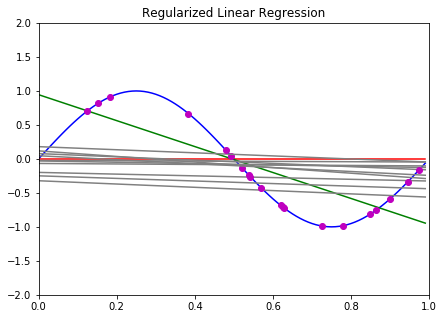

In [2]:
x = np.arange(0,1,0.01)
f = np.sin(2*np.pi*x) # 실제 sin함수 값
g1 = 0 * x; #0으로 채워진 리스트

w = np.polyfit(x,f,1); #linear regression 의 coefficient 값을 return
g2 = np.polyval(w,x); # g2 = w'x

plt.figure(1, figsize=(7,5));
plt.title('Linear Regression')
plt.xlim(0,1)
plt.ylim(-2,2)
plt.plot(x,f, color="blue"); #sin함수 plotting
plt.plot(x,g1, color="red"); #y=0 상수함수 plotting
plt.plot(x,g2, color="green");#y=w'x 선형회귀 plotting

plt.figure(2, figsize=(7,5));
plt.title('Regularized Linear Regression')
plt.xlim(0,1)
plt.ylim(-2,2)
plt.plot(x,f, color="blue"); #sin함수 plotting
plt.plot(x,g1, color="red"); #y=0 상수함수 plotting
plt.plot(x,g2, color="green");#y=w'x 선형회귀 plotting

#e1 = np.mean(np.dot((g1-f),(g1-f))); #상수함수의 전체 x에 대한 RSS (확인 필요)
#e2 = np.mean(np.dot((g2-f),(g2-f))); #선형회귀의 전체 x에 대한 RSS (확인 필요)

# number of observations
D = 10;
trainingCaseG1 = np.zeros((D, 100));
trainingCaseG2 = np.zeros((D, 100));
trainingCaseG3 = np.zeros((D, 100));

for i in range(D):
    trainingCaseX = np.random.uniform(0,1,2); #0과 1사이의 수 2개를 무작위로 뽑음
    trainingCaseF = np.sin(2*np.pi*trainingCaseX); #위 무작위 x에 대한 sin함수값

    w = np.polyfit(trainingCaseX, trainingCaseF,1); #sample points에 대한 linear regression coefficient
    g2 = np.polyval(w,x);
    
    plt.figure(1);
    plt.plot(trainingCaseX,trainingCaseF, 'mo'); #randomly sampled two points plotting
    plt.plot(x,g2, color="gray");# y=w'x 선형회귀 plotting
    
    tempTrainingCaseX = np.zeros((2,2));
    tempTrainingCaseX[0,:] = trainingCaseX;
    tempTrainingCaseX[1,:] = [1,1];
    
    randa = 1;
    # w = (X'*X+ramda*I)^(-1)*X'*trainF, linear regression 에 L2 정규화를 적용한 계수를 찾는 계산
    w = np.dot(np.transpose(np.dot(inv(np.dot(np.transpose(tempTrainingCaseX),tempTrainingCaseX) + randa + np.eye(2)), np.transpose(tempTrainingCaseX))), np.transpose(trainingCaseF));
    g3 = np.polyval(w,x);
    
    plt.figure(2);
    plt.plot(trainingCaseX,trainingCaseF, 'mo'); #randomly sampled two points plotting
    plt.plot(x,g3, color="gray");#sample point에 대한 regularized linear regression line plotting
    
    tempX = np.zeros((2,np.size(x)));
    tempX[0,:] = x;

    for j in range(np.size(x)):
        tempX[1,j] = 1;
        
    trainingCaseG3[i,:] = np.transpose(np.dot(np.transpose(w),tempX)); #regularized linear regression을 이용해 전체 x에 대한 estimated y를 저장
    
    # First Degree Line
    w = np.polyfit(trainingCaseX, trainingCaseF, 1);
    trainingCaseG2[i,:] = np.polyval(w,x); #linear regression을 이용해 전체 x에 대한 estimated y를 저장

    # Zero Degree Line
    w = np.polyfit(trainingCaseX, trainingCaseF, 0);
    trainingCaseG1[i,:] = np.polyval(w,x); #상수함수를 이용해 전체 x에 대한 estimated y를 저장

#각 case의 평균을 저장
meanG1 = np.zeros((np.size(x),1));
meanG2 = np.zeros((np.size(x),1));
meanG3 = np.zeros((np.size(x),1));

#각 case의 표준편차를 저장
stdG1 = np.zeros((np.size(x),1));
stdG2 = np.zeros((np.size(x),1));
stdG3 = np.zeros((np.size(x),1));

# 각 case의 bias를 저장
biasXG1 = np.zeros((np.size(x),1));
biasXG2 = np.zeros((np.size(x),1));
biasXG3 = np.zeros((np.size(x),1));
    
for j in range(np.size(x)):
    meanG1[j] = np.mean(trainingCaseG1[:,j]); 
    stdG1[j] = np.std(trainingCaseG1[:,j]);
    biasXG1[j] = (meanG1[j] - f[j])*(meanG1[j] - f[j]);
    
    meanG2[j] = np.mean(trainingCaseG2[:,j]);
    stdG2[j] = np.std(trainingCaseG2[:,j]);
    biasXG2[j] = (meanG2[j] - f[j])*(meanG2[j] - f[j]);
    
    meanG3[j] = np.mean(trainingCaseG3[:,j]);
    stdG3[j] = np.std(trainingCaseG3[:,j]);
    biasXG3[j] = (meanG3[j] - f[j])*(meanG3[j] - f[j]);

#각 case의 var를 저장
deviationG1 = np.zeros((np.size(x), D));
deviationG2 = np.zeros((np.size(x), D));
deviationG3 = np.zeros((np.size(x), D));

for i in range(np.size(x)):
    for j in range(D):
        deviationG1[i,j] = (trainingCaseG1[j,i] - meanG1[i]) * (trainingCaseG1[j,i] - meanG1[i]);
        deviationG2[i,j] = (trainingCaseG2[j,i] - meanG2[i]) * (trainingCaseG2[j,i] - meanG2[i]);
        deviationG3[i,j] = (trainingCaseG3[j,i] - meanG3[i]) * (trainingCaseG3[j,i] - meanG3[i]);
        
biasG1 = 0; biasG2 = 0; biasG3 = 0;
varG1 = 0; varG2 = 0; varG3 = 0;

#각 case의 평균 bias
biasG1 = np.mean(biasXG1);
biasG2 = np.mean(biasXG2);
biasG3 = np.mean(biasXG3);

#각 case의 평균 var
varG1 = np.mean(deviationG1);
varG2 = np.mean(deviationG2);
varG3 = np.mean(deviationG3);

print("Bias of %-42s %.4f" % ('zero degree line is', biasG1))
print("Bias of %-42s %.4f" % ('linear regression line is', biasG2))
print("Bias of %-42s %.4f\n" % ('regularized linear regression line is', biasG3))
print("Variance of %-38s %.4f" % ('zero degree line is', varG1))
print("Variance of %-38s %.4f" % ('linear regression line is', varG2))
print("Variance of %-38s %.4f" % ('regularized linear regression line is', varG3))


plt.show();

# 결과해석부
Linear regression과 Regularized linear regression의 bias를 살펴보면 Regularized linear regression이 조금 높은 것을 알 수 있습니다. 반면에 둘의 variance를 살펴보면 Regularized linear regression의 variance가 현저히 낮습니다.
하단의 그래프는 위에서부터 각각 Linear regression과 Regularized linear regression을 통해 fitting을 진행한 그래프입니다. 빨간색 선은 y=0 직선, 파란색 선은 실제 sin 함수의 그래프, 초록색 선은 linear regression을 이용해 plot한 그래프입니다. 보라색 점은 iteration을 진행하면서 fitting을 하기 위해 고른 두 점, 회색 선은 그 점을 이용해 fitting한 직선입니다.
그래프를 비교해 보면 Regularized 항이 있을 때, 계수가 더 작아짐으로 인해 기울기와 y절편의 크기가 대체로 작음을 알 수 있습니다. 또, 위의 결과와 그래프를 통하여 정규화를 통해 모델이 주어진 데이터에 둔감히 반응하게 만듦으로써 분산을 감소시켰음을 알 수 있습니다.